In [4]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [5]:
IMAGE_SIZE = 256
BATCH_SIZE =32
CHANNELS=3
EPOCHS=30

In [6]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
"resize dataset",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 5216 files belonging to 2 classes.


In [7]:
class_names = dataset.class_names
class_names

['NORMAL', 'PNEUMONIA']

In [8]:
len(dataset)

163

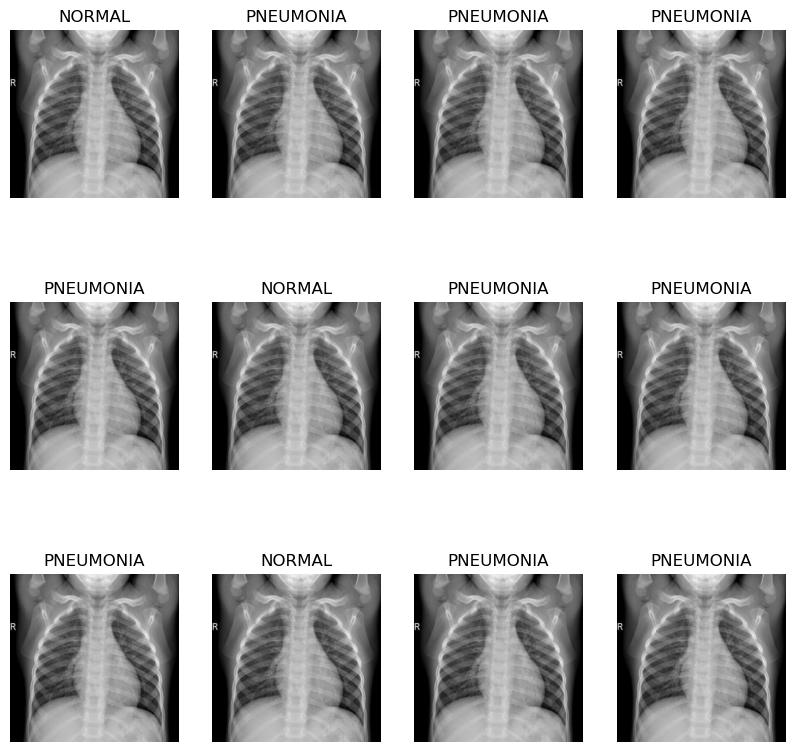

In [11]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[0].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")   

In [12]:
train_size=0.8
len(dataset)*train_size

130.4

In [13]:
train_ds=dataset.take(130)
len(train_ds)

130

In [14]:
test_ds=dataset.skip(54)
len(test_ds)

109

In [15]:
val_size=0.1
len(dataset)*val_size

16.3

In [16]:
val_ds =test_ds.take(16)
len(val_ds)

16

In [17]:
test_ds=test_ds.skip(16)
len(test_ds)

93

In [18]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    return train_ds,val_ds,test_ds

In [19]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [20]:
len(train_ds)

130

In [21]:
len(val_ds)

16

In [22]:
len(test_ds)

17

In [23]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE) #optimization
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [24]:
#RESCALING
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

Data Augmentation to make model Robust

In [25]:
data_augmentation =tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

# Convolutional Neural Networks (CNNs)

In [28]:
input_shape = (BATCH_SIZE,IMAGE_SIZE, IMAGE_SIZE,CHANNELS)
n_classes =2
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [29]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_13 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_13 (MaxPooli  (32, 127, 127, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPooli  (32, 62, 62, 64)          0         
 ng2D)                                                

In [30]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [31]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/30
130/130 [==============================] - 451s 3s/step - loss: 0.5821 - accuracy: 0.7411 - val_loss: 0.5585 - val_accuracy: 0.7559
Epoch 2/30
130/130 [==============================] - 333s 3s/step - loss: 0.5204 - accuracy: 0.7519 - val_loss: 0.4493 - val_accuracy: 0.7656
Epoch 3/30
130/130 [==============================] - 358s 3s/step - loss: 0.3733 - accuracy: 0.8358 - val_loss: 0.2725 - val_accuracy: 0.8984
Epoch 4/30
130/130 [==============================] - 427s 3s/step - loss: 0.2585 - accuracy: 0.8889 - val_loss: 0.3148 - val_accuracy: 0.8516
Epoch 5/30
130/130 [==============================] - 791s 6s/step - loss: 0.2267 - accuracy: 0.9079 - val_loss: 0.2143 - val_accuracy: 0.9160
Epoch 6/30
130/130 [==============================] - 420s 3s/step - loss: 0.1995 - accuracy: 0.9238 - val_loss: 0.1917 - val_accuracy: 0.9238
Epoch 7/30
130/130 [==============================] - 403s 3s/step - loss: 0.1909 - accuracy: 0.9257 - val_loss: 0.2651 - val_accuracy: 0.8672

In [32]:
scores = model.evaluate(test_ds)

17/17 [==============================] - 21s 540ms/step - loss: 0.1256 - accuracy: 0.9522


In [33]:
scores

[0.12557275593280792, 0.9522058963775635]

In [34]:
history

In [35]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 130}

In [36]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [37]:
history.history['accuracy']

[0.7411057949066162,
 0.7519230842590332,
 0.8358173370361328,
 0.888942301273346,
 0.907932698726654,
 0.9237980842590332,
 0.9257211685180664,
 0.9245192408561707,
 0.9295673370361328,
 0.9401442408561707,
 0.9372596144676208,
 0.9401442408561707,
 0.9408653974533081,
 0.9401442408561707,
 0.940625011920929,
 0.9418269395828247,
 0.9473557472229004,
 0.9533653855323792,
 0.9435096383094788,
 0.9497596025466919,
 0.9507211446762085,
 0.9490384459495544,
 0.949999988079071,
 0.9447115659713745,
 0.9543269276618958,
 0.9574519395828247,
 0.9516826868057251,
 0.9588942527770996,
 0.9557692408561707,
 0.9533653855323792]

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

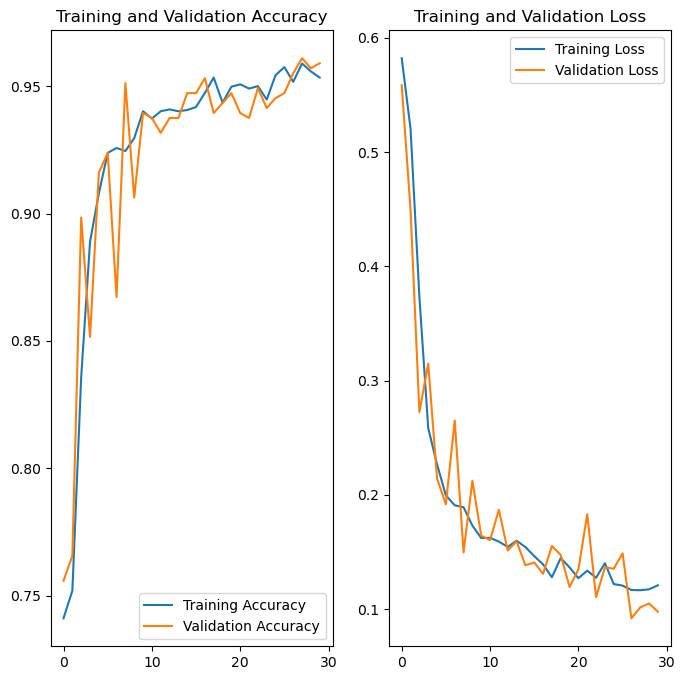

In [39]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training Loss')
plt.plot(range(EPOCHS),val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [40]:
import numpy as np

In [41]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0)
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])),2)
    return predicted_class,confidence

1/1 [==============================] - 0s 41ms/step


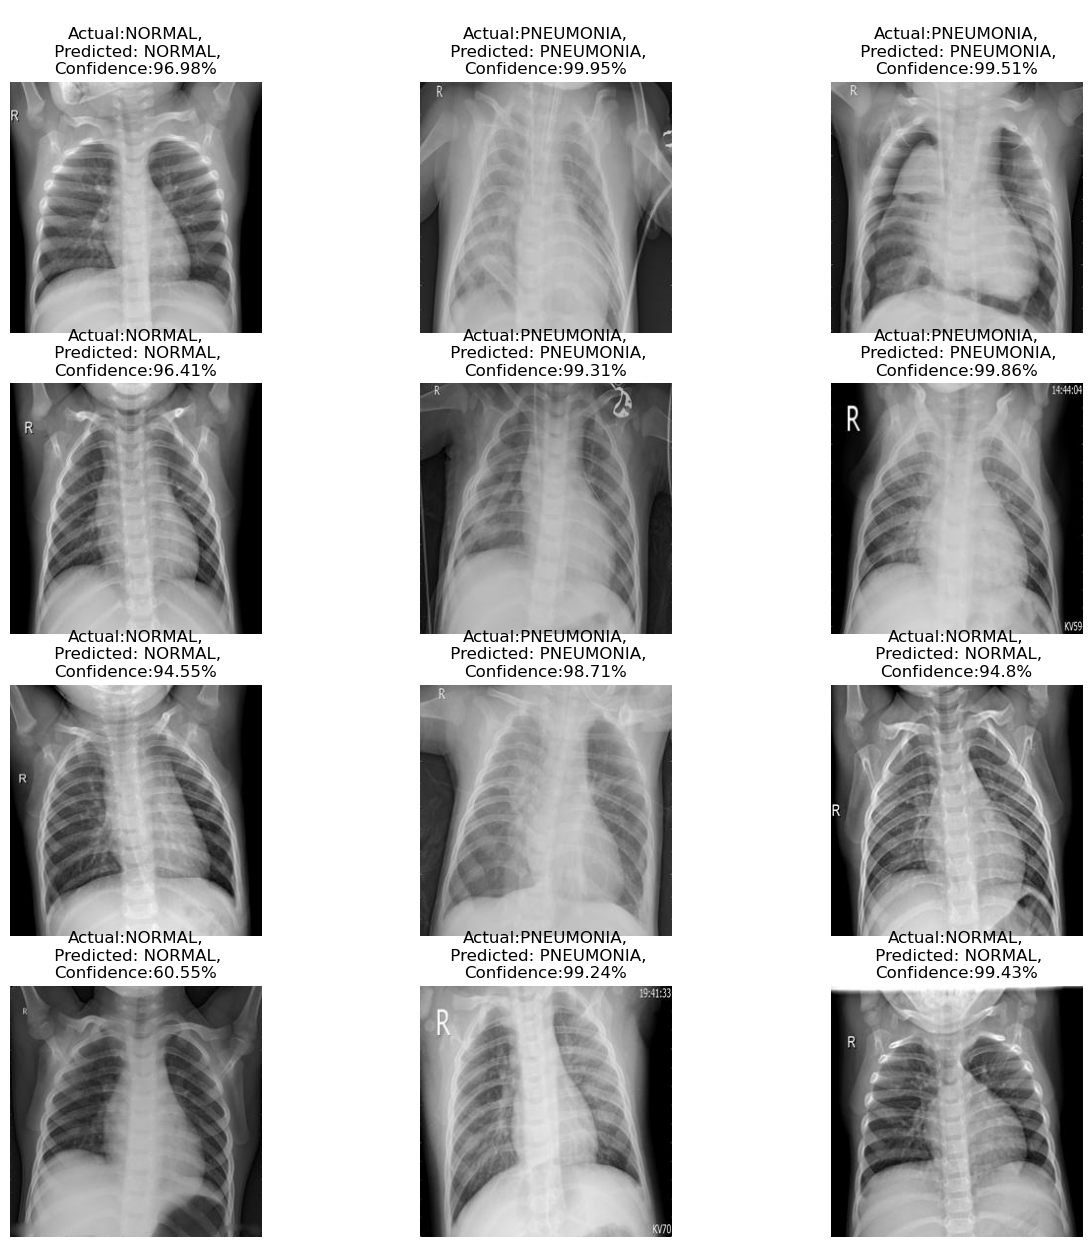

In [42]:
plt.figure(figsize=(15,15))
for images , labels in test_ds.take(1):
    for i in range(12):
        ax=plt.subplot(4,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class,confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"\nActual:{actual_class},\n Predicted: {predicted_class},\nConfidence:{confidence}%")
        plt.axis("off")

First image to Predict:


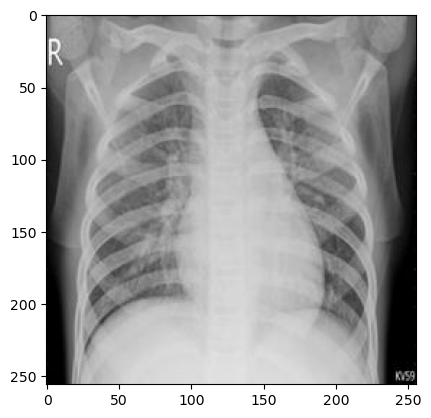

Actual Label: PNEUMONIA
1/1 [==============================] - 0s 490ms/step
Predicted Label: PNEUMONIA


In [62]:
import numpy as np
import matplotlib.pyplot as plt

for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("First image to Predict:")
    plt.imshow(first_image)
    plt.show()  # Add this line to display the image
    print("Actual Label:", class_names[first_label])
    
    batch_prediction = model.predict(images_batch)  # Fix the variable name here
    print("Predicted Label:", class_names[np.argmax(batch_prediction[0])])


In [63]:
import os
model_cersion=max([int(i) for i in os.listdir("../models")+[0]])+1
model.save(f"../models/{model_cersion}")

INFO:tensorflow:Assets written to: ../models/9\assets


INFO:tensorflow:Assets written to: ../models/9\assets
